<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-torhec1234/blob/main/Reduccion_dimensiones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nombre: Héctor Salvador Montañez Alvarez 

Matrícula:A01332665 

Materia: Ciencia y Analítica de datos 

# Bienvenido al notebook
#Repaso de Reducción de dimensiones
El objetivo es que entendamos de una manera visual, que es lo que pasa cuando nosotros seleccionamos cierto número de componentes principales o % de variabilidad  de una base de datos.

Primero entenderemos, que pasa adentro de PCA que se basa en lo siguiente a grandes razgos:

**Análisis de Componentes Principales**

El análisis de datos multivariados involucra determinar transformaciones lineales que ayuden
a entender las relaciones entre las características importantes de los datos. La idea central del Análisis de Componentes Principales (PCA) es reducir las dimensiones de un conjunto de datos que presenta variaciones correlacionadas, reteniendo una buena proporción de la variación presente en dicho conjunto. Esto se logra obteniendo la transformación a un nuevo conjunto de variables: los componentes principales (PC). Cada PC es una combinación lineal con máxima varianza en dirección ortogonal a los demás PC.


![title](https://miro.medium.com/max/720/1*XGaA7KWUlhWZLIezYEBIHA.gif)


Para entender un poco más de PCA y SVD, visita el siguiente link:
*Truco: Prueba entrar con tu cuenta del tec :)*

https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8


Basicamente, vamos a seguir los siguientes pasos:

1. Obtener la covarianza. OJO: X tiene sus datos centrados :)

![title](https://miro.medium.com/max/194/1*92t9OuqxIG0YpJXsNNgI4A.png)

2. Los componentes principales se van a obtener de la eigen descomposicion de la matriz de covarianza.

![title](https://miro.medium.com/max/260/1*c1S0_26A8RxEQQUVyMp5Vw.png)

3. Para la reducción de dimensiones vamos a seleccionar k vectores de W y proyectaremos nuestros datos.

![title](https://miro.medium.com/max/214/1*jnj2YMpWIApnCzxRU_zjfg.png)

![title](https://miro.medium.com/max/720/1*ba0XpZtJrgh7UpzWcIgZ1Q.jpeg)






# Ejercicio 1, Descomposición y composición
***Descomposición***

Encuentra los eigenvalores y eigenvectores de las siguientes matrices

$A = \begin{pmatrix} 3,0,2 \\ 3,0,-2 \\ 0,1,1 \end{pmatrix}$
$A2 = \begin{pmatrix} 1,3,8 \\ 2,0,0 \\ 0,0,1 \end{pmatrix}$
$A3 = \begin{pmatrix} 5,4,0 \\ 1,0,1 \\ 10,7,1 \end{pmatrix}$

y reconstruye la matriz original a traves de las matrices 
$WDW^{-1}$ (OJO. Esto es lo mismo de la ecuación del paso 2 solo le cambiamos la variable a la matriz diagonal)




# Eigenvalores y eigenvectores

In [204]:
###-----------------EJEMPLO DE EIGENVALORES
import numpy as np
from numpy import array
from numpy.linalg import eig
# define la matriz
A = array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

print("-------Matriz original-------")
print(A)
print("-----------------------------")
# calcula la eigendescomposición
values, vectors = eig(A)
print("-------------D----------------")
print(values) #D
print("--------------W---------------")
print(vectors) #W
print("-----------------------------")

#Ejemplo de reconstrucción


values, vectors = np.linalg.eig(A)
print("--------PROBAMOS W---------------------")
W = vectors
print(vectors)
print(W)

print("--------PROBAMOS W INV-------------")
Winv = np.linalg.inv(W)

print(Winv)
pr = Winv @ W
print(pr)
print("---------PROBAMOS D--------------------")
D = np.diag(values)
print(D)
print("-------------------------------")
#la matriz B tiene que dar igual a A
#reconstruye la matriz 
print("-------Matriz reconstruida-------")
# Realiza la reconstruccion de B=W*D*Winv, te da lo mismo de A?
#ojo, estas multiplicando matrices, no escalares ;)
#TU CODIGO AQUI-------------------------------------
B= W@D@Winv
B = np.round(B)
print(B)


-------Matriz original-------
[[1 2 3]
 [4 5 6]
 [7 8 9]]
-----------------------------
-------------D----------------
[ 1.61168440e+01 -1.11684397e+00 -1.30367773e-15]
--------------W---------------
[[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]
-----------------------------
--------PROBAMOS W---------------------
[[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]
[[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]
--------PROBAMOS W INV-------------
[[-0.48295226 -0.59340999 -0.70386772]
 [-0.91788599 -0.24901003  0.41986593]
 [ 0.40824829 -0.81649658  0.40824829]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
---------PROBAMOS D--------------------
[[ 1.61168440e+01  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -1.11684397e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -1.303677

In [207]:
#Primera matriz reconstruida 
A = array([[3, 0, 2], [3, 0, -2], [0, 1, 1]])
print("-------Matriz original-------")
print(A)
print("-----------------------------")
values, vectors = eig(A)
values, vectors = np.linalg.eig(A)
W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)
print("-------Matriz reconstruida-------")

B= W@D@Winv
B = np.round(B)
print(B)

-------Matriz original-------
[[ 3  0  2]
 [ 3  0 -2]
 [ 0  1  1]]
-----------------------------
-------Matriz reconstruida-------
[[ 3.+0.j  0.-0.j  2.-0.j]
 [ 3.-0.j  0.+0.j -2.+0.j]
 [ 0.+0.j  1.-0.j  1.+0.j]]


In [226]:
#Segunda matriz reconstruida 
A = array([[1, 3, 8], [2, 0, 0], [0, 0, 1]])


print("-------Matriz original-------")
print(A)
print("-----------------------------")
values, vectors = eig(A)
values, vectors = np.linalg.eig(A)
W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)
print("-------Matriz reconstruida-------")

B= W@D@Winv
B = np.round(B)
print(B)

-------Matriz original-------
[[1 3 8]
 [2 0 0]
 [0 0 1]]
-----------------------------
-------Matriz reconstruida-------
[[1. 3. 8.]
 [2. 0. 0.]
 [0. 0. 1.]]


In [205]:
#Tecera =
A = array([[5, 4, 0], [1, 0, 1], [10, 7, 1]])

print("-------Matriz original-------")
print(A)
print("-----------------------------")
values, vectors = eig(A)
values, vectors = np.linalg.eig(A)
W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)
print("-------Matriz reconstruida-------")

B= W@D@Winv
B = np.round(B)
print(B)

-------Matriz original-------
[[ 5  4  0]
 [ 1  0  1]
 [10  7  1]]
-----------------------------
-------Matriz reconstruida-------
[[ 5.  4. -0.]
 [ 1. -0.  1.]
 [10.  7.  1.]]


In [66]:
A2 = array([[1, 3, 8], [2, 0, 0], [0, 0, 1]])
values, vectors = eig(A2)
print(values) #D
print(vectors) #W


[ 3. -2.  1.]
[[ 0.83205029 -0.70710678 -0.42399915]
 [ 0.5547002   0.70710678 -0.8479983 ]
 [ 0.          0.          0.31799936]]


In [67]:

A3 = array([[5, 4, 0], [1, 0, 1], [10, 7, 1]])
values, vectors = eig(A3)
print(values) #D
print(vectors) #W

[ 6.89167094 -0.214175   -0.67749594]
[[ 0.3975395   0.55738222  0.57580768]
 [ 0.18800348 -0.72657211 -0.81728644]
 [ 0.89811861 -0.40176864 -0.02209943]]


**¿Qué significa  reducir dimensiones?**

Esto será cuando proyectemos a ese espacio de los componentes principales pero no los seleccionemos todos, solo los más importantes y viajemos de regreso a nuestras unidades a través de una proyección.

Es decir:
Unidades-PC
PC-Unidades

Veamoslo gráficamente, ¿qué pasa con esa selección de los PCs y su efecto?.


Para ello usaremos Singular Value Descomposition (SVD).



# Singular Value Descomposition(SVD)

Es otra descomposición que tambien nos ayudara a reducir dimensiones.

<img src="https://miro.medium.com/max/720/1*6wkgGgBy2NLVmRVOw8K86w.png" width="300">



#Ejercicio 2
Juega con Lucy, una cisne, ayudala a encontrar cuantos valores singulares necesita para no perder calidad a través de SVD. Posteriormente usa 3 imágenes de tu preferencia y realiza la misma acción :D

A esto se le llama **compresión de imagenes** :o

[72. 73. 74. ... 48. 47. 47.]


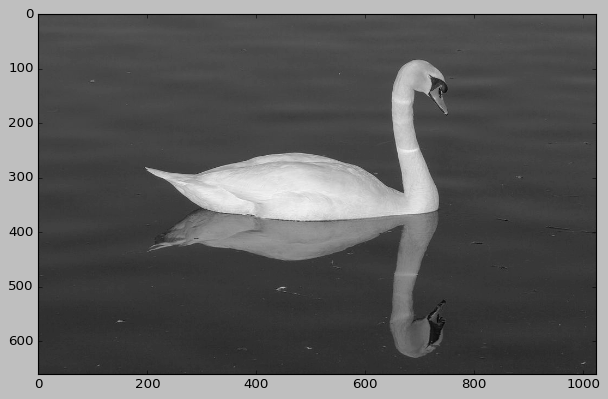

<PIL.Image.Image image mode=LA size=1024x660 at 0x7F1CD53B7C50>


In [68]:
from six.moves import urllib
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://biblioteca.acropolis.org/wp-content/uploads/2015/03/Cisne.jpg')).convert('LA')
#img = Image.open('lucy.jpg')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

In [69]:
U,D,V = np.linalg.svd(imgmat)
imgmat.shape


(660, 1024)

In [70]:
U.shape

(660, 660)

In [71]:
V.shape

(1024, 1024)

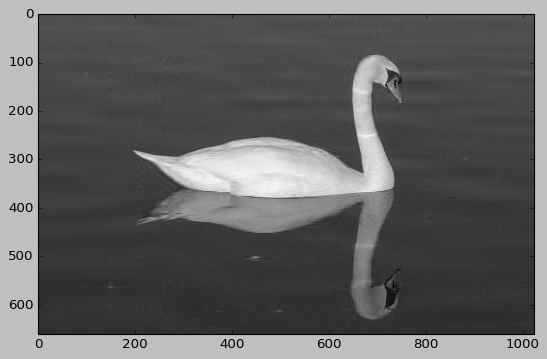

Felicidades la imagen está comprimida


In [88]:
#Cuantos valores crees que son necesarios?
#A=U*D*V
#aqui los elegiremos---------------------------
# por las dimensiones de este caso en particular 
#iremos de 0-660, siendo 660 como normalmente están los datos
#con 50 podemos observar que Lucy se ve casi igual, es decir conservamos aquello que en 
# realidad estaba aportando a la imagen en este caso :D por medio de la variabilidad 
#juega con el valor nvalue y ve que pasa con otros valores
nvalue = 50
#-----------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
#ve las dimensiones de la imagen y su descomposicion
#660x1024= U(660X660)D(660X1024)V(1024x1024)
        #=U(660Xnvalues)D(nvaluesXnvalue)V(nvaluesx1024)

        #=U(660X50)(50X50)(50X1024)
plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

¡Ahora es tu turno!, comprime 3 imagenes

[250. 250. 250. ... 244. 245. 245.]


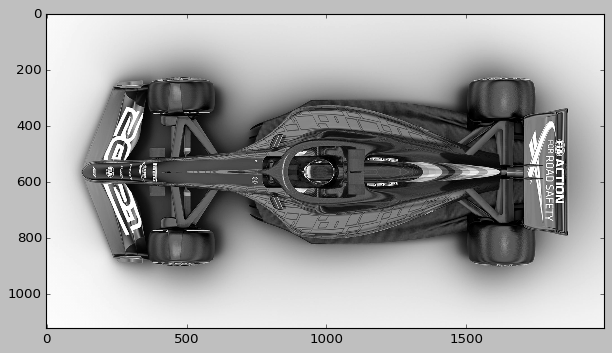

<PIL.Image.Image image mode=LA size=1994x1122 at 0x7F1CC4FC38D0>


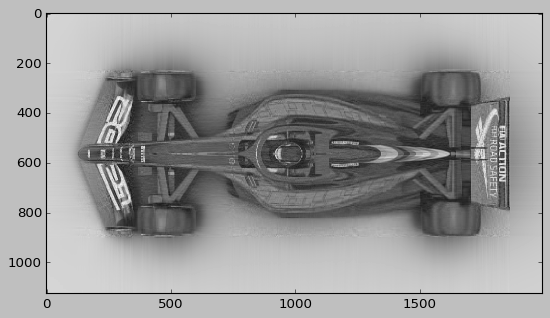

Primera Imagen comprimida 


In [221]:
plt.style.use('classic')   #Agregamos el url donde encotramos la imagen 
img = Image.open(urllib.request.urlopen('https://www.formula1.com/content/dam/fom-website/manual/Misc/2021-Master-Folder/F1%202021%20LAUNCH%20RENDERING%20(5).jpg.transform/9col-retina/image.jpg')).convert('LA')
#img = Image.open('lucy.jpg')
imggray = img.convert('LA') #Convertimos la imagen   
imgmat1 = np.array(list(imggray.getdata(band=0)),float)

print(imgmat1)#mostramos el arrglo de datos de informacion

imgmat1.shape = (imggray.size[1],imggray.size[0]) #Obtenemos la dimension (tamano de la imagen)

plt.figure(figsize=(9,6))
plt.imshow(imgmat1,cmap='gray')
plt.show()
print(img)#imprimimos la imagen en su calidad original
U,D,V = np.linalg.svd(imgmat1)
imgmat1.shape
nvalue = 50 #numero de iteraciones con la que deseamos retirar formacion
#-----------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])

plt.imshow(reconstimg,cmap='gray')
plt.show()

print("Primera Imagen comprimida ")

[132. 132. 132. ... 233. 231. 228.]


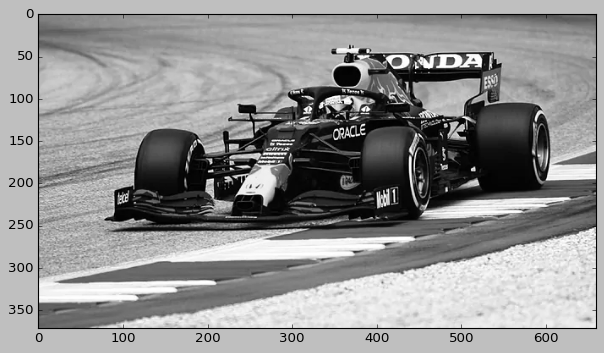

<PIL.Image.Image image mode=LA size=660x371 at 0x7F1CC4FC3610>


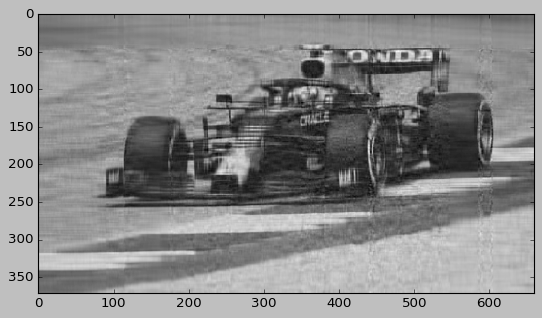

Segunda Imagen Comprimida 


In [222]:
#imagen 2
plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://phantom-marca.unidadeditorial.es/949fc97e0b083cf3409344438440389d/resize/660/f/webp/assets/multimedia/imagenes/2021/07/04/16254082126275.jpg')).convert('LA')
#img = Image.open('lucy.jpg')
imggray = img.convert('LA')
imgmat2 = np.array(list(imggray.getdata(band=0)),float)

print(imgmat2)

imgmat2.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat2,cmap='gray')
plt.show()
print(img)
U,D,V = np.linalg.svd(imgmat2)
imgmat2.shape
nvalue = 30
#-----------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])

plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Segunda Imagen Comprimida ")

[207. 207. 207. ...  13.  13.  13.]


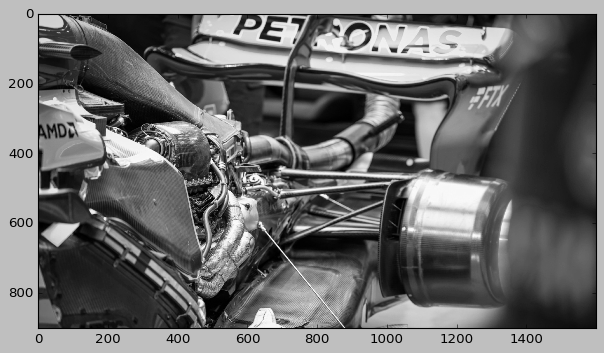

<PIL.Image.Image image mode=LA size=1600x900 at 0x7F1CD2E89150>


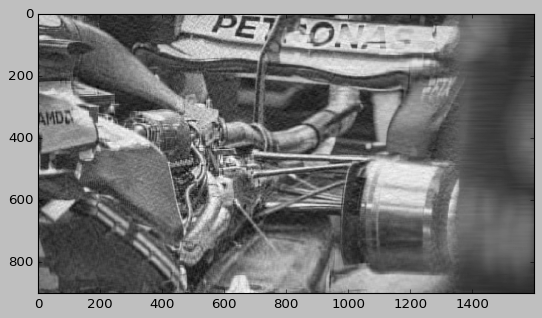

Tercera Imagen Comprimida


In [112]:
#imagen 3
plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://d3cm515ijfiu6w.cloudfront.net/wp-content/uploads/2022/07/20174139/mercedes-f1-engine-2022-planet-f1.jpg')).convert('LA')
#img = Image.open('lucy.jpg')
imggray = img.convert('LA')
imgmat3 = np.array(list(imggray.getdata(band=0)),float)

print(imgmat3)

imgmat3.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat3,cmap='gray')
plt.show()
print(img)
U,D,V = np.linalg.svd(imgmat3)
imgmat3.shape
nvalue = 60
#-----------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])

plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Tercera Imagen Comprimida")

# Ejercicio 3

**Feature importances**

Para este ejercicio, te pediremos que sigas el tutorial de la siguiente pagina:

https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e




In [125]:
#tu codigo aqui
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
plt.style.use('ggplot')
# Load the data
iris = datasets.load_iris() #descargamos los datos de nuevo del data set iris 
X = iris.data
y = iris.target
# Z-score the features
scaler = StandardScaler() #nos interesa ibtener mean y la desviacion
scaler.fit(X)
X = scaler.transform(X)
# The PCA model
pca = PCA(n_components=2) # estimate only 2 PCs
X_new = pca.fit_transform(X) # project the original data into the PCA space

Describe lo relevante del ejercicio y que descubriste de las variables análizadas. 

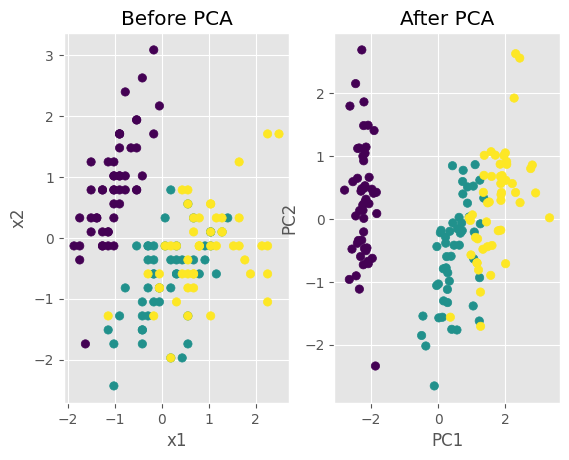

In [126]:
fig, axes = plt.subplots(1,2)
axes[0].scatter(X[:,0], X[:,1], c=y)
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Before PCA')
axes[1].scatter(X_new[:,0], X_new[:,1], c=y)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')
plt.show()
#despues del ajuste podemos observar que los datos se encuentran mas distantes entre si por lo que nos ayuda a entrenar modelos de forma mas limpia

In [127]:
np.cov(X_new.T)
#los valores en diagonal corresponden a la varianza de PCA

array([[2.93808505e+00, 5.33928780e-16],
       [5.33928780e-16, 9.20164904e-01]])

In [115]:
print(pca.explained_variance_ratio_)


[0.72962445 0.22850762]


In [116]:
pca.explained_variance_

array([2.93808505, 0.9201649 ])

In [117]:
print(abs( pca.components_ ))
#Aqui podemos observar la relevancia para PC1 que ponemos en primer ligar a 3 con 0.58 luego a 4 con 0.56 seguido por 1 y 2 
#Diferente pars PC2 que tenemos a 2 y a 1 

[[0.52106591 0.26934744 0.5804131  0.56485654]
 [0.37741762 0.92329566 0.02449161 0.06694199]]


In [223]:
def biplot(score, coeff , y):

   
    xs = score[:,0] # projection on PC1
    ys = score[:,1] # projection on PC2
    n = coeff.shape[0] # number of variables
    plt.figure(figsize=(10,8), dpi=100)
    classes = np.unique(y)
    colors = ['g','r','y']
    markers=['o','^','x']
    for s,l in enumerate(classes):
        plt.scatter(xs[y==l],ys[y==l], c = colors[s], marker=markers[s]) # color based on group
    for i in range(n):
        #plot as arrows the variable scores (each variable has a score for PC1 and one for PC2)
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'k', alpha = 0.9,linestyle = '-',linewidth = 1.5, overhang=0.2)
        plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'k', ha = 'center', va = 'center',fontsize=10)

    plt.xlabel("PC{}".format(1), size=14)
    plt.ylabel("PC{}".format(2), size=14)
    limx= int(xs.max()) + 1
    limy= int(ys.max()) + 1
    plt.xlim([-limx,limx])
    plt.ylim([-limy,limy])
    plt.grid()
    plt.tick_params(axis='both', which='both', labelsize=14)

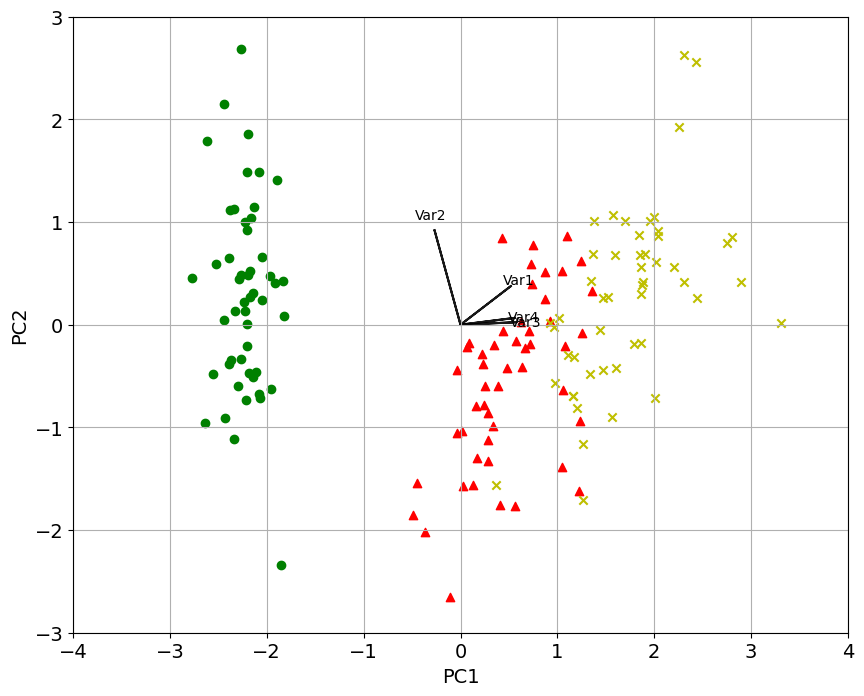

In [224]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault) # reset ggplot style
# Call the biplot function for only the first 2 PCs
biplot(X_new[:,0:2], np.transpose(pca.components_[0:2, :]), y)
plt.show()
#aqui podemos observar de manera visual el dominio de cada entrada para  PC1 y PC2 

Realiza un comentario relacionado a los pasos que se llevaron a cabo en este proceso de features importances.



---


**¿Qué es feature importance y para que nos sirve?**
 
 
Cuando nos encontramos con bases datos, es común que estemos enfrentándonos con muchas categorías que describen la variable de salida y como bien sabemos, para tener un modelo adecuado debemos de ingresar la información más limpia y relevante posible. Por lo que requerimos acudir a métodos matemáticos para reducir la información sin perder fidelidad.
 
Uno de esos métodos es PCA que reduce categorías al evaluar la importancia de cada feature y lo expresa en nuevas agrupaciones de feature. Al hacer un PCA estará compuesta por la interrelación de cada variable de entrada. Nos ayuda a reducir complejidad y aumentar eficiencia en el proceso de generación y evaluación de modelos.
 
 
 
---
 
 
**¿Qué hallazgos fueron los más relevantes durante el análisis del ejercicio?**
 
 
Considero que tener la capacidad de manejar en arreglos de categorías para la reducción de una dimensión me parece sumamente interesante ya que ahora mediante PCA1 y PCA2 muestras cada variable de salida y cada agrupación es una combinación de las categorías iniciales en una proporción constante.   Es importante que la información que sea tratada mediante PCA ya se encuentre procesada y limpia (Datos faltantes, Datos fuera de rango, errores,etc) ya que si no se hace adecuadamente estas herramientas arrastraron errores en adelante y afectaron considerablemente el desempeño del modelo.
 
 
 
---
 
 
**¿Dónde lo aplicarías o te sería de utilidad este conocimiento?**
 
Ese método lo aplicaría con un dataset en el que  las categorías tengan relación entre sí  (ortogonalidad )  aplicando  primero un gráfico de ortogonalidad y evaluar si es una metodología adecuada.  De igual forma lo evaluará de acuerdo a la cantidad de datos disponibles, mayores datos mayor confiabilidad de aplicar PCA.

